<a href="https://colab.research.google.com/github/Sayan-coder/Major-Project/blob/main/MentalHealthPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#Importing the libraries
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [33]:
#Importing the dataset
from google.colab import files
uploaded=files.upload()

Saving data.csv to data (3).csv


In [34]:
#Loading the dataset
df=pd.read_csv('data.csv')

#Printing 10 instances of the data
df.tail

<bound method NDFrame.tail of     inter_dom Region  Gender  ... Alone_bi  Others_bi  Internet_bi
0       Inter    SEA    Male  ...       No         No           No
1       Inter    SEA    Male  ...       No         No           No
2       Inter    SEA    Male  ...       No         No           No
3       Inter     EA  Female  ...       No         No           No
4       Inter     EA  Female  ...       No         No           No
..        ...    ...     ...  ...      ...        ...          ...
281       NaN    NaN     NaN  ...      NaN        NaN          NaN
282       NaN    NaN     NaN  ...      NaN        NaN          NaN
283       NaN    NaN     NaN  ...      NaN        NaN          NaN
284       NaN    NaN     NaN  ...      NaN        NaN          NaN
285       NaN    NaN     NaN  ...      NaN        NaN          NaN

[286 rows x 50 columns]>

In [35]:
#Getting the shape of the data
df.shape

(286, 50)

In [36]:
#Exploring the data
df.describe()

,Age,Age_cate,Stay,Japanese,English,ToDep,ToSC,APD,AHome,APH,Afear,ACS,AGuilt,AMiscell,ToAS,Partner,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,242.000000
mean,20.873134,2.559701,2.149254,3.097015,3.649254,8.186567,37.473881,15.414179,9.608209,9.138060,7.257463,6.063433,3.783582,21.115672,72.380597,4.320896,4.063433,4.373134,3.070896,2.947761,2.287313,2.671642,1.917910,2.940299,2.141791,3.020661
std,2.765279,1.070624,1.326805,1.306104,0.880564,4.954728,9.234120,6.174439,4.011156,4.194651,3.111676,2.600721,1.909417,7.402149,22.644888,2.233892,1.935207,2.072367,1.853888,1.829091,1.529824,1.714779,1.406504,2.030705,1.504814,1.719906
min,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000,8.000000,8.000000,4.000000,5.000000,4.000000,3.000000,2.000000,10.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,2.000000,1.000000,2.000000,3.000000,5.000000,31.000000,10.000000,6.000000,5.000000,4.000000,3.000000,2.000000,15.000000,56.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,20.000000,2.000000,2.000000,3.000000,4.000000,8.000000,40.000000,16.000000,9.000000,9.000000,7.000000,6.000000,4.000000,20.000000,72.000000,5.000000,4.000000,5.000000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000
75%,22.000000,3.000000,3.000000,4.000000,4.000000,11.000000,46.000000,19.000000,12.000000,11.000000,9.000000,8.000000,5.000000,26.000000,88.000000,6.250000,5.000000,6.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000
max,31.000000,5.000000,10.000000,5.000000,5.000000,25.000000,48.000000,39.000000,20.000000,25.000000,17.000000,13.000000,10.000000,47.000000,145.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [37]:
#Checking if there is any null values are present or not
df.isna().sum()

inter_dom          18
Region             18
Gender             18
Academic           18
Age                18
Age_cate           18
Stay               18
Stay_Cate          18
Japanese           18
Japanese_cate      18
English            18
English_cate       18
Intimate           26
Religion           18
Suicide            18
Dep                16
DepType            15
ToDep              18
DepSev             13
ToSC               18
APD                18
AHome              18
APH                18
Afear              18
ACS                18
AGuilt             18
AMiscell           18
ToAS               18
Partner            18
Friends            18
Parents            18
Relative           18
Profess            18
 Phone             18
Doctor             18
Reli               18
Alone              18
Others             18
Internet           44
Partner_bi          3
Friends_bi          3
Parents_bi         14
Relative_bi        14
Professional_bi    14
Phone_bi           14
Doctor_bi 

In the above exploaration, we found out that the number of missing values in most cases are more than 5% of the data, that is if we do 5% of 286 = 14.3, which exceeds the limit of our missing values in most cases. Moreover its Multivariate Analysis, so we need to keep in account all the columns which are contributing to the analysis and hence forth we can't drop those columns. However we can drop which are less than that.

In [38]:
#Dropping out those columns whose missing values are less than or equal to 14
df.drop(columns=['Internet_bi', 'Others_bi', 'Alone_bi', 'religion_bi', 'Doctor_bi', 'Phone_bi', 'Professional_bi', 'Relative_bi', 'Parents_bi', 'Friends_bi', 'Partner_bi', 'DepSev'], inplace=True)

In [39]:
#Here those features with have a greater effect on the data analysis.
df.isna().sum()

inter_dom        18
Region           18
Gender           18
Academic         18
Age              18
Age_cate         18
Stay             18
Stay_Cate        18
Japanese         18
Japanese_cate    18
English          18
English_cate     18
Intimate         26
Religion         18
Suicide          18
Dep              16
DepType          15
ToDep            18
ToSC             18
APD              18
AHome            18
APH              18
Afear            18
ACS              18
AGuilt           18
AMiscell         18
ToAS             18
Partner          18
Friends          18
Parents          18
Relative         18
Profess          18
 Phone           18
Doctor           18
Reli             18
Alone            18
Others           18
Internet         44
dtype: int64

So with the useful data as of now, we can convert the categorical data into numerical values for analysis.

In [40]:
#Converting inter_dom to Numerical data
df['inter_dom2']=pd.factorize(df.inter_dom)[0]       #Replacing them
df.drop(columns=['inter_dom'], inplace=True)         #Dropping the original column  
#df.rename(columns={"inter_dom2":"inter_dom"})        #Renaming it for convinience

#To check which values are being assigned we do this
#df.inter_dom2.value_counts()

In [41]:
#Converting Region to Numerical data
df['Region2']=pd.factorize(df.Region)[0]       #Replacing them
df.drop(columns=['Region'], inplace=True)         #Dropping the original column  
#df.rename(columns={"Region2":"Region"})        #Renaming it for convinience

#df.Region2.value_counts()

In [42]:
#Converting Gender to Numerical data
df['Gender2']=pd.factorize(df.Gender)[0]       #Replacing them
df.drop(columns=['Gender'], inplace=True)         #Dropping the original column  
#df.rename(columns={"Gender2":"Gender"})        #Renaming it for convinience

In [43]:
#Converting Academic to Numerical data
df['Academic2']=pd.factorize(df.Academic)[0]       #Replacing them
df.drop(columns=['Academic'], inplace=True)         #Dropping the original column  

In [44]:
#Converting Stay_Cate to Numerical data
df['Stay_Cate2']=pd.factorize(df.Stay_Cate)[0]       #Replacing them
df.drop(columns=['Stay_Cate'], inplace=True)         #Dropping the original column  

In [45]:
#Converting Japanese_cate to Numerical data
df['Japanese_cate']=pd.factorize(df.Japanese_cate)[0]       #Replacing them
df.drop(columns=['Japanese_cate'], inplace=True)         #Dropping the original column  

In [46]:
#Converting English_cate to Numerical data
df['English_cate2']=pd.factorize(df.English_cate)[0]       #Replacing them
df.drop(columns=['English_cate'], inplace=True)         #Dropping the original column  

In [47]:
#Converting Intimate to Numerical data
df['Intimate2']=pd.factorize(df.Intimate)[0]       #Replacing them
df.drop(columns=['Intimate'], inplace=True)         #Dropping the original column  

In [48]:
#Converting Religion to Numerical data
df['Religion2']=pd.factorize(df.Religion)[0]       #Replacing them
df.drop(columns=['Religion'], inplace=True)         #Dropping the original column  

In [49]:
#Converting Suicide to Numerical data
df['Suicide2']=pd.factorize(df.Suicide)[0]       #Replacing them
df.drop(columns=['Suicide'], inplace=True)         #Dropping the original column  

In [50]:
#Converting Dep to Numerical data
df['Dep2']=pd.factorize(df.Dep)[0]       #Replacing them
df.drop(columns=['Dep'], inplace=True)         #Dropping the original column  

In [51]:
#Converting DepType to Numerical data
df['DepType2']=pd.factorize(df.DepType)[0]       #Replacing them
df.drop(columns=['DepType'], inplace=True)         #Dropping the original column  

In [52]:
#While we are converting our data, it is bound to get shuffled and hence we need to have proper display, 
#before we can get hold of the features and the target variable
pd.options.display.max_columns = None
display(df)

,Age,Age_cate,Stay,Japanese,English,ToDep,ToSC,APD,AHome,APH,Afear,ACS,AGuilt,AMiscell,ToAS,Partner,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet,inter_dom2,Region2,Gender2,Academic2,Stay_Cate2,English_cate2,Intimate2,Religion2,Suicide2,Dep2,DepType2
0,24.0,4.0,5.0,3.0,5.0,0.0,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,NaN,0,0,0,0,0,0,-1,0,0,0,0
1,28.0,5.0,1.0,4.0,4.0,2.0,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,NaN,0,0,0,0,1,0,-1,1,0,0,0
2,25.0,4.0,6.0,4.0,4.0,2.0,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0
3,29.0,5.0,1.0,2.0,3.0,3.0,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,NaN,0,1,1,0,1,1,1,1,0,0,0
4,28.0,5.0,1.0,1.0,3.0,3.0,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,NaN,0,1,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [53]:
#Changing NaNs to 0
df=df.fillna(0)

In [54]:
#Splitting the data into labels and features
X1=df.iloc[:,0:34]
X2=df.iloc[:,35:37] 
X=X1.join(X2) #Features
#X = X.values.reshape(1,-1)
Y=df.iloc[:,34:35] #Label
#Y = Y.values.reshape(1,-1)
#print(Y)

#print(X1)
#print(X2)

      Age  Age_cate  Stay  Japanese  English  ToDep  ToSC   APD  AHome   APH  \
0    24.0       4.0   5.0       3.0      5.0    0.0  34.0  23.0    9.0  11.0   
1    28.0       5.0   1.0       4.0      4.0    2.0  48.0   8.0    7.0   5.0   
2    25.0       4.0   6.0       4.0      4.0    2.0  41.0  13.0    4.0   7.0   
3    29.0       5.0   1.0       2.0      3.0    3.0  37.0  16.0   10.0  10.0   
4    28.0       5.0   1.0       1.0      3.0    3.0  37.0  15.0   12.0   5.0   
..    ...       ...   ...       ...      ...    ...   ...   ...    ...   ...   
281   0.0       0.0   0.0       0.0      0.0    0.0   0.0   0.0    0.0   0.0   
282   0.0       0.0   0.0       0.0      0.0    0.0   0.0   0.0    0.0   0.0   
283   0.0       0.0   0.0       0.0      0.0    0.0   0.0   0.0    0.0   0.0   
284   0.0       0.0   0.0       0.0      0.0    0.0   0.0   0.0    0.0   0.0   
285   0.0       0.0   0.0       0.0      0.0    0.0   0.0   0.0    0.0   0.0   

     Afear   ACS  AGuilt  AMiscell  ToA

In [89]:
#Splitting the training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)

<function matplotlib.pyplot.show>

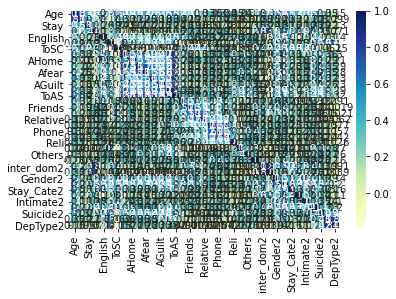

In [90]:
#Visualizing the data
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


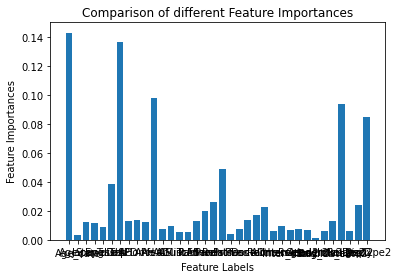

In [91]:
#Feature Selection using Extra Tree Classifier

# Building the model 
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2) 
  
# Training the model 
extra_tree_forest.fit(X, Y) 
  
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0) 

# Plotting a Bar Graph to compare the models 
plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

In [92]:
#Feature Selection Using Chi Square Test
selector = SelectKBest(k=25)
X_train_selected = selector.fit_transform(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
#Using Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_selected,Y_train)
# select the same features on the test set, predict, and get the test accuracy:
X_test_selected = selector.transform(X_test)
y_pred = lr.predict(X_test_selected)
accuracy_score(Y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.896551724137931

In [94]:
#Using KNeighbors Classifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train_selected, Y_train)  
X_test_selected = selector.transform(X_test)
y_pred = classifier.predict(X_test_selected)
accuracy_score(Y_test, y_pred)

#Creating the confusion matrix
confusion_matrix=confusion_matrix(Y_test,y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

[[ 6  0  0]
 [ 0 37  5]
 [ 0  5  5]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         6
           0       0.88      0.88      0.88        42
           1       0.50      0.50      0.50        10

    accuracy                           0.83        58
   macro avg       0.79      0.79      0.79        58
weighted avg       0.83      0.83      0.83        58



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
#Using Support Vector Machine
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train_selected, Y_train)  
X_test_selected = selector.transform(X_test)
y_pred = classifier.predict(X_test_selected)
accuracy_score(Y_test, y_pred)

#Creating the confusion matrix
confusion_matrix=confusion_matrix(Y_test,y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

[[ 6  0  0]
 [ 0 40  2]
 [ 0  4  6]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         6
           0       0.91      0.95      0.93        42
           1       0.75      0.60      0.67        10

    accuracy                           0.90        58
   macro avg       0.89      0.85      0.87        58
weighted avg       0.89      0.90      0.89        58



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
#Using Naive Bayes Classifier
classifier = GaussianNB()  
classifier.fit(X_train_selected, Y_train)  
X_test_selected = selector.transform(X_test)
y_pred = classifier.predict(X_test_selected)
accuracy_score(Y_test, y_pred)

#Creating the confusion matrix
confusion_matrix=confusion_matrix(Y_test,y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

[[ 6  0  0]
 [ 0 39  3]
 [ 0  4  6]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         6
           0       0.91      0.93      0.92        42
           1       0.67      0.60      0.63        10

    accuracy                           0.88        58
   macro avg       0.86      0.84      0.85        58
weighted avg       0.88      0.88      0.88        58



/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
